In [30]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
from matplotlib import pyplot as plt
import mpl_axes_aligner

import seaborn as sns
import zipfile
from cycler import cycler

pd.options.display.float_format = '{:.4f}'.format


# global plotting settings
plt.style.use(['ggplot'])
plt.style.use('dark_background')
default_cycler = (plt.rcParams['axes.prop_cycle'][:4]  +
                  cycler(linestyle=['-', '--', ':', '-.']))

plt.rcParams.update({'axes.grid' : True, 
#                      'axes.facecolor' : 'white', 
                     'axes.edgecolor' : '.15',
#                      'axes.labelcolor' : 'black',
                     'yaxis.labellocation' : 'center',
                     'lines.marker' : '.',
                     'lines.linestyle' : 'None',
                     'grid.color' : '.8',
                     'axes.prop_cycle' : default_cycler,
                     'figure.figsize' : (10*1.8, 5.65*1.8),
                     'mathtext.default' : 'regular'
                    })
point_marker_style = dict(ls='', markersize = 2)

# plt.rc('axes', prop_cycle=default_cycler)

data_dir = f'/home/otto/data/atmos-flux-data/methane-gapfill/data_dir/'

def read_l3(filepath, datecol='DATE'):
    df = (pd.read_csv(filepath, header=0, low_memory=False)
      .replace(-9999, np.nan).replace(99999, np.nan)
      .assign(date = lambda x: pd.to_datetime(x[datecol]))
      .set_index('date', drop=False)
     )
    df.index = df.index.set_names(None)
    return df

filepath = '/home/otto/data/atmos-flux-data/processed/ATMOS_L3_2024-04-09.csv'
l3 = read_l3(filepath)

predictors = 'all'
filepath = f'/home/otto/data/atmos-flux-data/methane-gapfill/data_dir/ATMOS_20240516_{predictors}/gapfilled/rf_predictors_laplace.csv'
rf = read_l3(filepath).add_suffix('_RF')

# filepath = f'/home/otto/data/atmos-flux-data/methane-gapfill/data_dir/ATMOS_20240202_{predictors}/gapfilled/ann_predictors_laplace.csv'
# ann = read_l3(filepath).add_suffix('_ANN')

l3 = pd.concat([l3, rf.loc[:,'FCH4_F_RF':]], axis=1)
# l3.to_csv(f'./output/csv/ATMOS_L3_{datetime.now().strftime("%Y%m%d")}_ch4gapfilled.csv', index = False)

platt_constant = rf['FCH4_F_UNCERTAINTY_RF'] / rf.loc[:, [f'FCH4_F{i}_RF' for i in range(1,11)]].std(axis=1)
# (platt_constant)

# # output L3 fluxes with ch4 gap filling

# filepath = '/home/otto/data/atmos-flux-data/processed/ATMOS_L3_2023-04-25_fluxgapfill.csv'
# l3 = read_l3(filepath)

# predictors = 'baseflux'
# filepath = f'/home/otto/data/atmos-flux-data/methane-gapfill/data_dir/ATMOS_20230425_{predictors}/gapfilled/rf_predictors_laplace.csv'
# rf = read_l3(filepath).add_suffix('_RF')

# filepath = f'/home/otto/data/atmos-flux-data/methane-gapfill/data_dir/ATMOS_20230425_{predictors}/gapfilled/ann_predictors_laplace.csv'
# ann = read_l3(filepath).add_suffix('_ANN')

# l3 = pd.concat([l3, rf.loc[:,'FCH4_F_RF':], ann.loc[:,'FCH4_F_ANN':]], axis=1)
l3.to_csv(f'./output/csv/ATMOS_L3_{datetime.now().strftime("%Y-%m-%d")}_ch4gapfilled.csv', index = False)

## Uncertainty aggregation

In [6]:
l3.columns[l3.columns.str.contains('NEE')]

Index(['NEE_uStar_f', 'NEE_uStar_fqc', 'NEE_uStar_fall', 'NEE_uStar_fall_qc',
       'NEE_uStar_fnum', 'NEE_uStar_fsd', 'NEE_uStar_fmeth', 'NEE_uStar_fwin',
       'NEE_U05_f', 'NEE_U05_fqc', 'NEE_U05_fall', 'NEE_U05_fall_qc',
       'NEE_U05_fnum', 'NEE_U05_fsd', 'NEE_U05_fmeth', 'NEE_U05_fwin',
       'NEE_U50_f', 'NEE_U50_fqc', 'NEE_U50_fall', 'NEE_U50_fall_qc',
       'NEE_U50_fnum', 'NEE_U50_fsd', 'NEE_U50_fmeth', 'NEE_U50_fwin',
       'NEE_U95_f', 'NEE_U95_fqc', 'NEE_U95_fall', 'NEE_U95_fall_qc',
       'NEE_U95_fnum', 'NEE_U95_fsd', 'NEE_U95_fmeth', 'NEE_U95_fwin', 'NEE_f',
       'NEE_fsd'],
      dtype='object')

In [33]:
l3.loc[:, ['co2_flux', 'NEE_f', 'NEE_uStar_f', 'NEE_uStar_fall', 'NEE_uStar_fsd', 'NEE_orig_sd', 'NEE_uStar_fqc', 'NEE_resid']]

,co2_flux,NEE_f,NEE_uStar_f,NEE_uStar_fall,NEE_uStar_fsd,NEE_orig_sd,NEE_uStar_fqc,NEE_resid
2022-05-24 10:30:00,-15.0656,-15.0656,-15.0656,-13.8164,1.7666,1.7666,0,-1.2492
2022-05-24 11:00:00,-12.7544,-12.7544,-12.7544,-13.9100,1.6343,1.6343,0,1.1556
2022-05-24 11:30:00,NaN,-21.2222,-21.2222,-21.2222,2.9215,NaN,1,NaN
2022-05-24 12:00:00,NaN,-16.4143,-16.4143,-16.4143,3.7300,NaN,1,NaN
2022-05-24 12:30:00,-20.2106,-20.2106,-20.2106,-19.7643,1.1175,1.1175,0,-0.4463
...,...,...,...,...,...,...,...,...
2023-12-20 13:00:00,NaN,-2.1846,-2.1584,-2.1584,1.0375,NaN,1,NaN
2023-12-20 13:30:00,-2.8111,-2.8111,-2.8111,-0.0044,2.6760,2.6760,0,-2.8066
2023-12-20 14:00:00,-2.2633,-2.2633,-1.0420,-1.0420,1.5931,1.5931,1,NaN
2023-12-20 14:30:00,0.2794,0.2794,0.2794,-0.0044,2.6760,2.6760,0,0.2839


In [32]:
l3 = l3.assign(NEE_orig_sd = np.where(l3['co2_flux'].notna(), l3['NEE_uStar_fsd'], np.nan),
               NEE_uStar_fgood = np.where(l3['NEE_uStar_fqc'].notna() & l3['NEE_uStar_fqc'] <= 1, l3['NEE_uStar_f'], np.nan),
               NEE_resid = np.where(l3['NEE_uStar_fqc']==0, l3['co2_flux'] - l3['NEE_uStar_fall'], np.nan)
              )

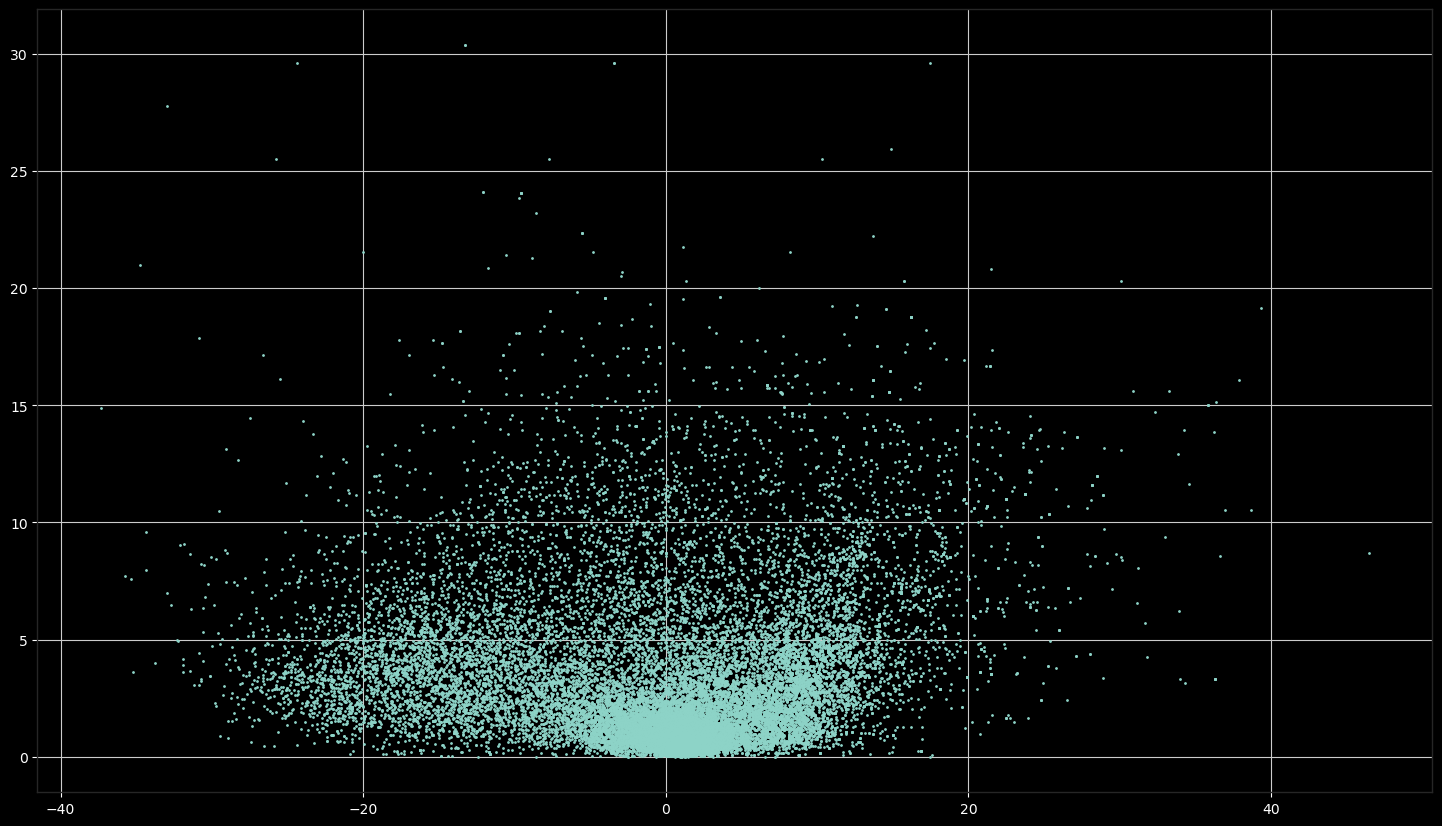

In [46]:
plt.plot(l3['NEE_uStar_f'], l3['NEE_uStar_fsd'],
#          color='k',
         **point_marker_style)

In [9]:
l3.loc[:, ['co2_flux', 'NEE_f']].sum(axis=0)

co2_flux   -27219.8594
NEE_f        1899.8662
dtype: float64

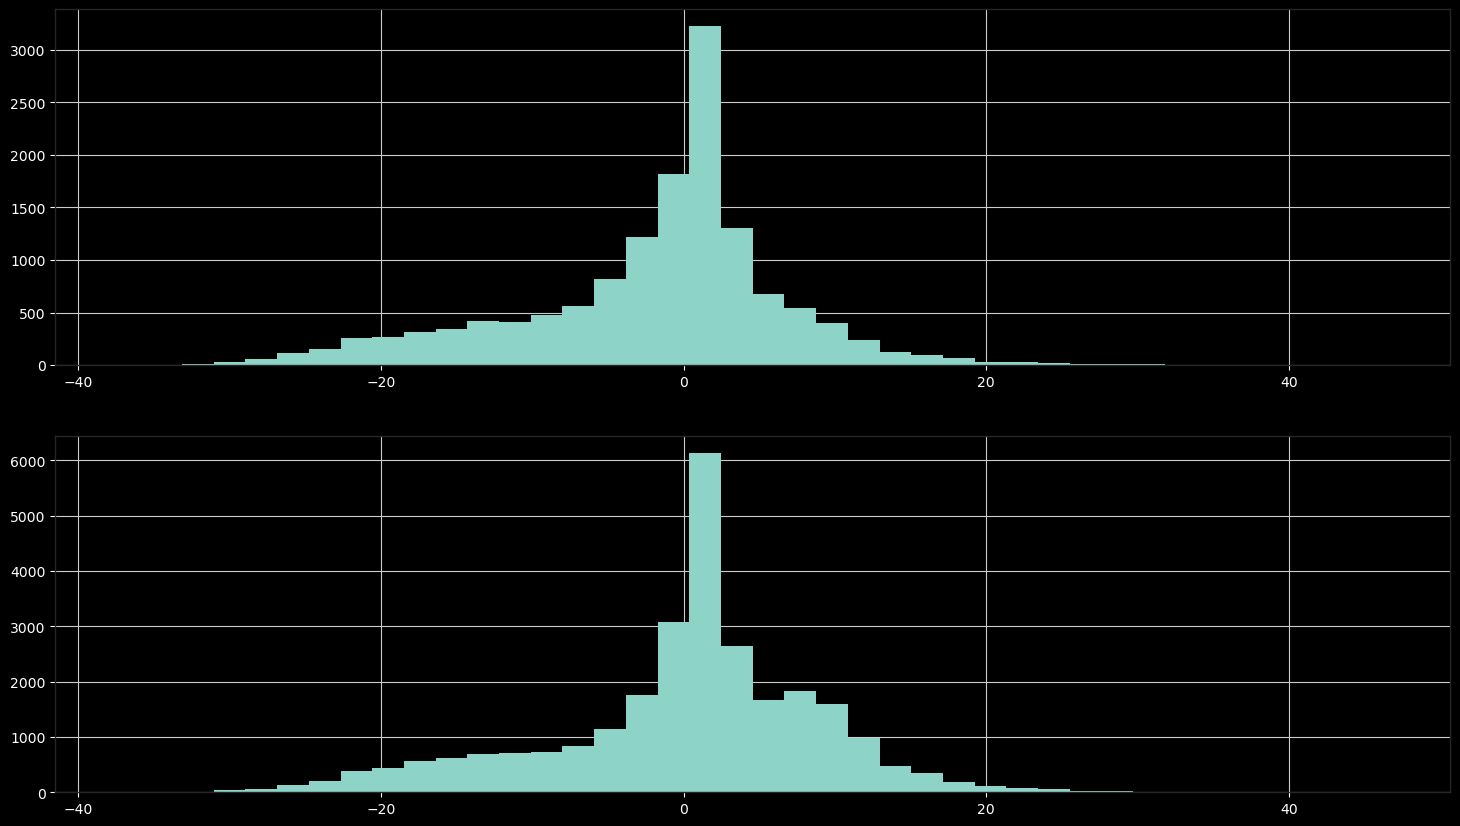

In [39]:
fig, ax = plt.subplots(2,1)
histbins = 40
ax[0].hist(l3['co2_flux'], bins = histbins)
ax[1].hist(l3['NEE_f'], bins = histbins)
plt.show()

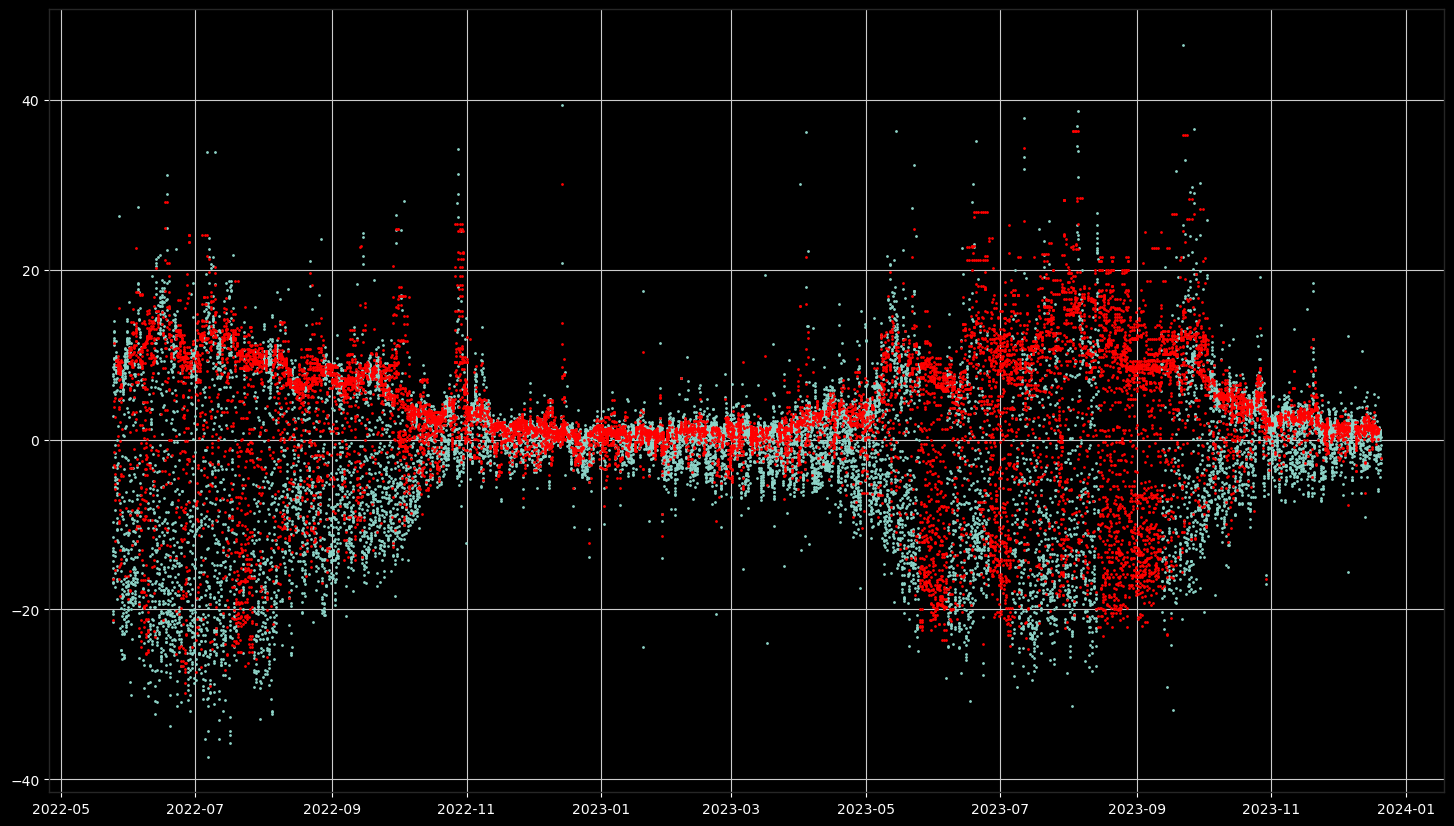

In [45]:
fig, ax = plt.subplots()

ax.plot(l3['co2_flux'], 
#         color='#808080', 
        **point_marker_style)
ax.plot(l3.loc[l3['co2_flux'].isna(), 'NEE_f'], color = 'r', **point_marker_style)

## Annual metrics

In [20]:
cols = ['TA_EP','T60','Tsoil_mean','SWC_mean','Precip']

annualmet = l3[cols].agg(['mean', 'min', 'max'])
annualmet.loc['sum', 'Precip'] = l3.loc[:, 'Precip'].sum()
annualmet.loc['std', ['TA_EP', 'T60', 'Tsoil_mean', 'SWC_mean']] = l3.loc[:, ['TA_EP', 'T60', 'Tsoil_mean', 'SWC_mean']].std()
# mean and standard deviation of TA_EP, mean and ReddyProc unc of co2_flux, mean and gap-fill unc of FCH4

# annualmet.loc['uncertainty', :] = annualmet.std()
# annualmet.loc['uncertainty', ['NEE_f','co2_flux','FCH4_f','FCH4_F_RF']] = np.NaN

annualmet

,TA_EP,T60,Tsoil_mean,SWC_mean,Precip
mean,14.5708,12.8905,12.0557,0.3123,0.1476
min,-23.1185,-24.1000,0.1017,0.0015,0.0000
max,38.4823,34.8000,23.3299,0.4210,67.3000
sum,NaN,NaN,NaN,NaN,2086.6000
std,10.7091,10.3425,6.6915,0.0770,NaN


<AxesSubplot:>

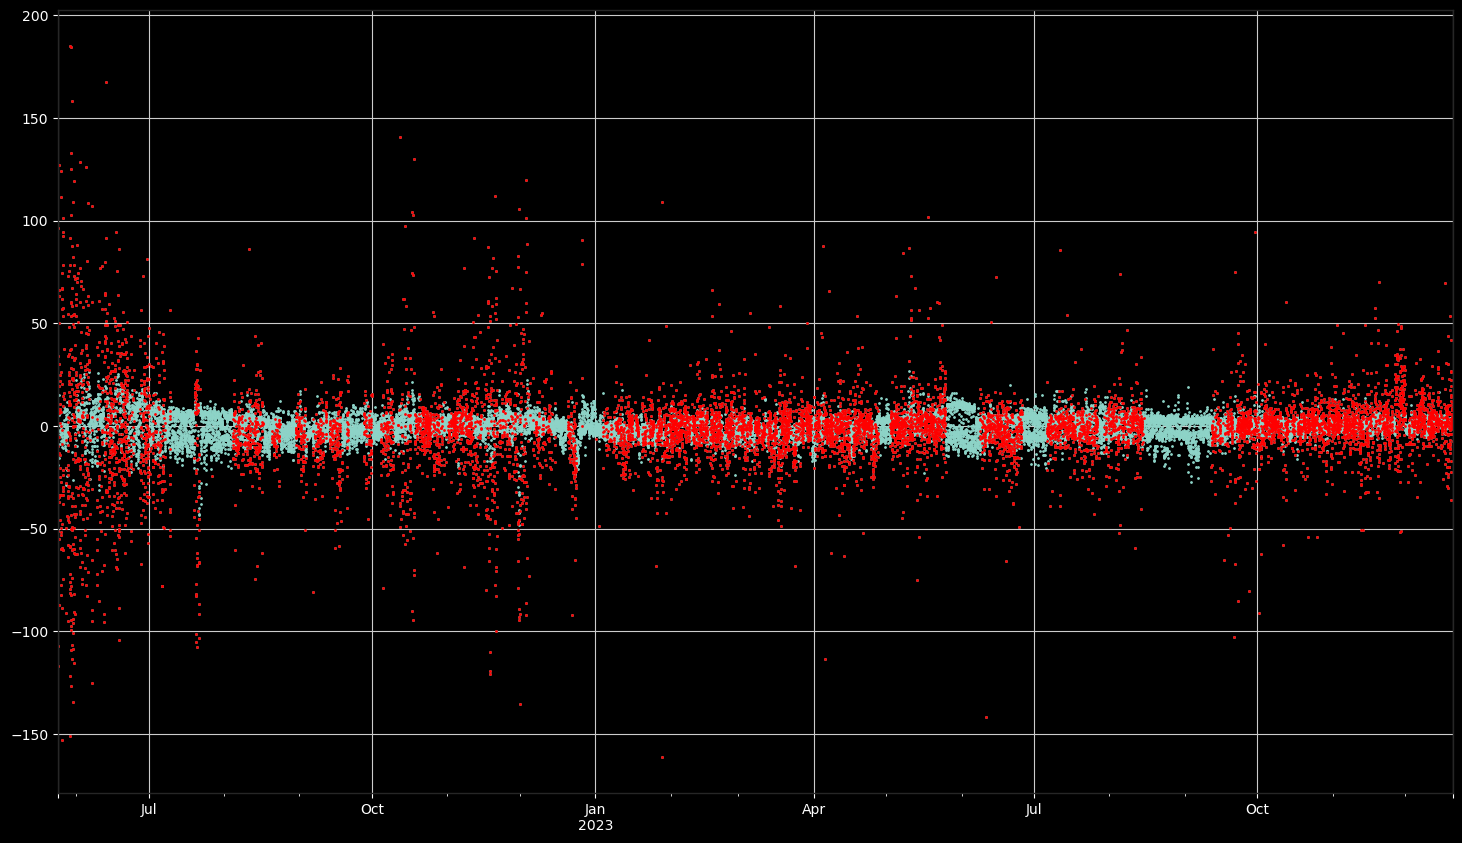

In [29]:
fig, ax = plt.subplots()
l3.loc[:, 'FCH4_F_RF'].plot(ax=ax, **point_marker_style)
(l3.loc[:, 'ch4_flux'] * 1000).plot(ax=ax, color = 'r', **point_marker_style)

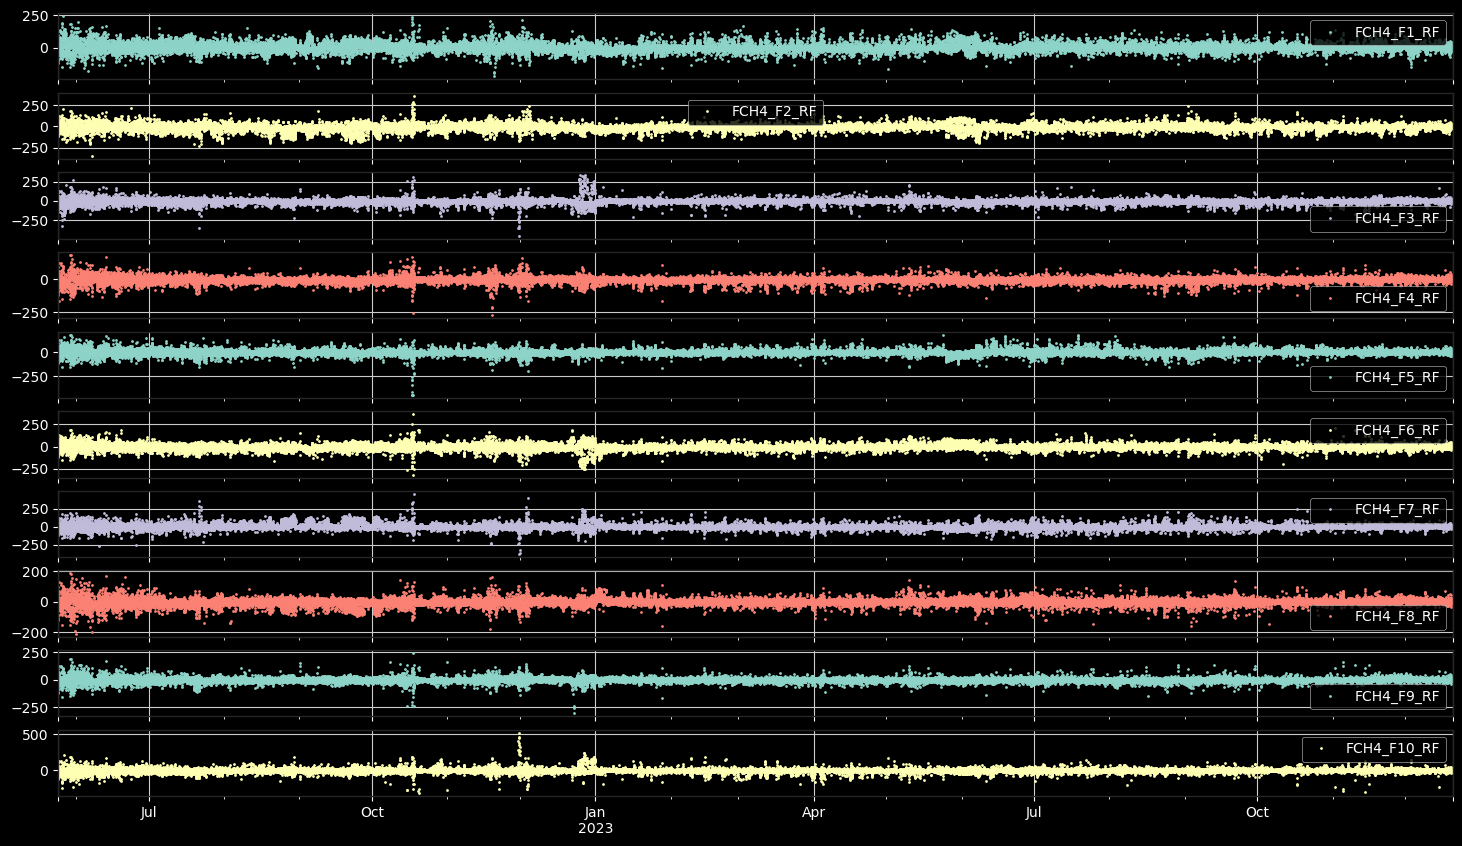

In [23]:
l3.loc[:, cols].plot(legend=True, subplots=True, **point_marker_style)
plt.show()

In [4]:
ustars = l3.loc[:, 'ustar_thr'].unique()
ustars

array([0.16688629, 0.14673631])

In [5]:
# cols = ['ch4_flux', 'co2_flux', 'h2o_flux', 'NEE_f', 'FCH4_F_RF']
cols = ['ch4_flux', 'co2_flux', 'h2o_flux', 'NEE_f', 'FCH4_f']
data_coverage = l3[cols].count()/l3.shape[0]
data_coverage

ch4_flux   0.3966
co2_flux   0.5107
h2o_flux   0.5377
NEE_f      1.0000
FCH4_f     1.0000
dtype: float64

In [35]:
nmoltogC = 1800 / 1000 / 1000 / 1000 * 12.01 # [nmol m-2 s-1] * (s 30min-1) / (nmol umol-1) / (umol mmol-1) / (mmol mol-1) * (gC molC-1)
umoltogC = 1800 / 1000 / 1000 * 12.01 # [umol m-2 s-1] * (s 30min-1) / (umol mmol-1) / (mmol mol-1) * (gC molC-1)
umoltomgC = 1800 / 1000 * 12.01 # [umol m-2 s-1] * (s 30min-1) / (umol mmol-1) * (mgC mmolC-1)
# cols = ['ch4_flux','FCH4_F_RF', 'FCH4_F_ANN', 'FCH4_f', 'co2_flux', 'NEE_f', 'GPP_f', 'Reco']

cols = ['ch4_flux', 'co2_flux', 'NEE_f', 'GPP_f', 'Reco']
budget = l3[cols] * umoltogC
budget.loc[:, 'FCH4_F_RF'] = l3['FCH4_F_RF'] * nmoltogC
budget = budget.sum(axis=0)
budget['H_f'] = l3['H_f'].sum() / 1000
budget['LE_f'] = l3['LE_f'].sum() / 1000

# budget['NEE_%grow'] = l3.loc['2022-06':'2022-09-01', 'NEE_f'].sum()
budget['FCH4_uptake'] = l3.loc[l3['FCH4_F_RF']<0, 'FCH4_F_RF'].sum() * nmoltogC
budget['FCH4_emission'] = l3.loc[l3['FCH4_F_RF']>0, 'FCH4_F_RF'].sum() * nmoltogC
budget['FCH4_uptake%'] = budget['FCH4_uptake'] / (abs(budget['FCH4_uptake']) + abs(budget['FCH4_emission']))
budget['FCH4_emission%'] = budget['FCH4_emission'] / (abs(budget['FCH4_uptake']) + abs(budget['FCH4_emission']))
budget['FCH4_co2eq'] = budget['FCH4_F_RF'] / 12.01 * 16.04 * 45
budget['FCH4_co2eq_up'] = budget['FCH4_uptake'] / 12.01 * 16.04 * 45
budget['FCH4_co2eq_emit'] = budget['FCH4_emission'] / 12.01 * 16.04 * 45
budget['NEE_co2eq'] = budget['NEE_f'] / 12.01 * 44.01 # gC to molC, molC to gCO2
budget['rad_balance'] = (budget['FCH4_co2eq_up']) + (budget['FCH4_co2eq_emit']) + budget['NEE_co2eq']
# pd.concat([budget, pd.DataFrame({'rad_balance': budget['FCH4_f'] * 45 + budget['NEE_f'], 
#                                  'ch4_to_0rad': budget['NEE_f'] / 45})])
budget['ch4_to_0rad'] = -(budget['NEE_co2eq'] / 45 / 16.04 * 12.01) # gCO2eq to gCH4, gCH4 to molC, molC to gC  
budget

ch4_flux            -0.3324
co2_flux          -588.4389
NEE_f               41.0713
GPP_f             3786.0559
Reco              3827.1272
FCH4_F_RF           -0.3901
H_f                417.9220
LE_f              1822.2881
FCH4_uptake         -2.3479
FCH4_emission        1.9578
FCH4_uptake%        -0.5453
FCH4_emission%       0.4547
FCH4_co2eq         -23.4462
FCH4_co2eq_up     -141.1084
FCH4_co2eq_emit    117.6622
NEE_co2eq          150.5036
rad_balance        127.0574
ch4_to_0rad         -2.5042
dtype: float64

In [36]:
cols = [f'FCH4_F{i}_RF' for i in range(1,11)]
# cols = [f'FCH4_F' for i in range(1,11)]
model_sum = l3.loc[:, cols].sum(axis=0) * nmoltogC
ch4_budget = [model_sum.mean(), model_sum.std() * 1.4210]
ch4_budget
# model_sum

[-0.3901203151997995, 2.5725134668639265]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

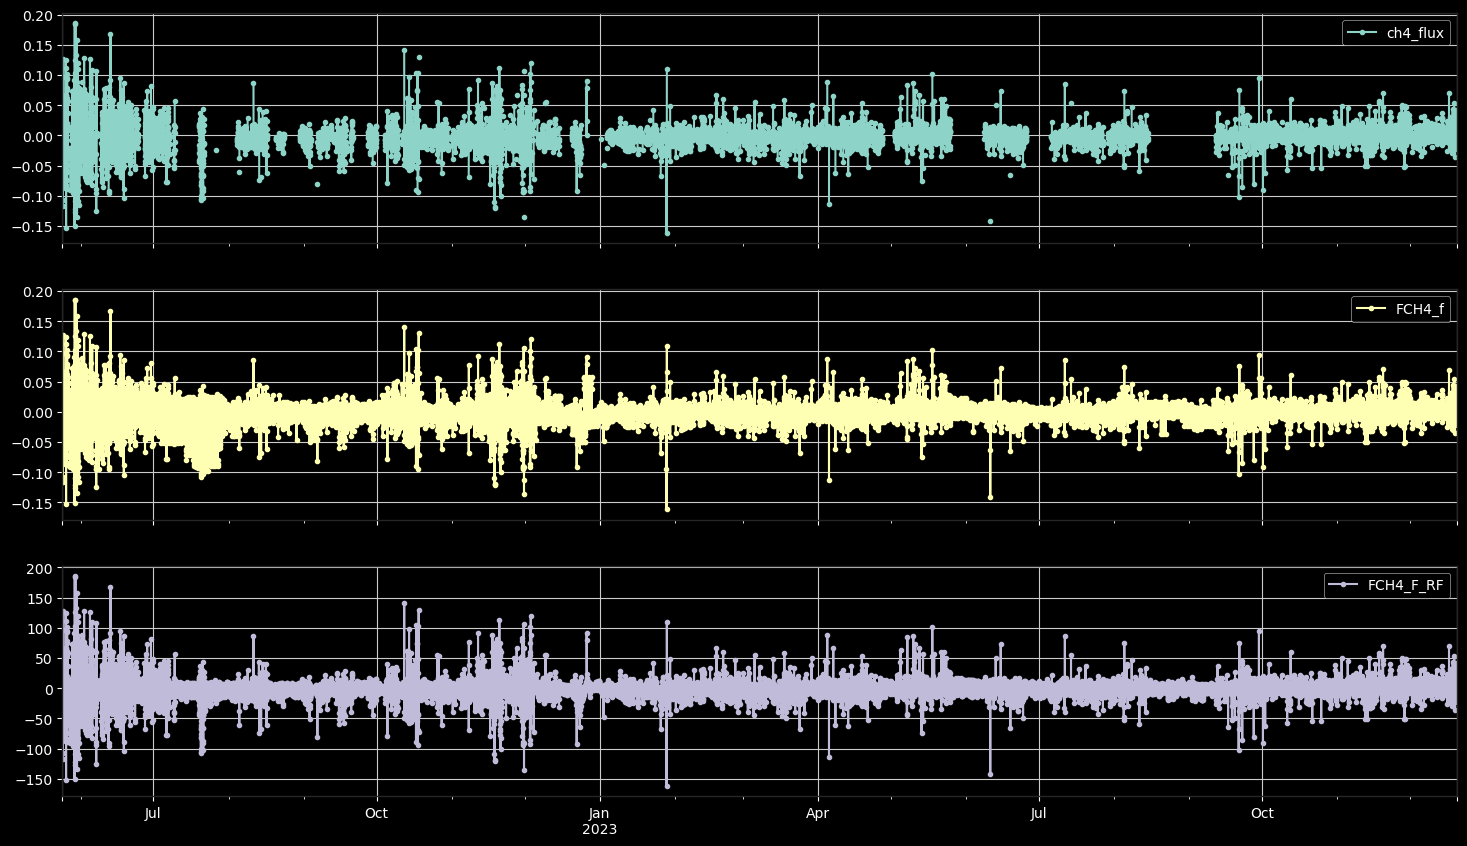

In [37]:
cols = [
    'ch4_flux',
    'FCH4_f', 
    'FCH4_F_RF', 
#     'FCH4_F_ANN',
]
l3[cols].plot(subplots=True)

In [10]:
weekly = l3.groupby(l3.date.dt.to_period('W')).agg(TA_EP_mean = ('TA_EP', np.mean),
                                                  Tsoil_mean=('Tsoil_mean', np.mean), 
                                                  SWC_mean=('SWC_mean', np.mean), 
                                                  FCH4_f_mean=('FCH4_f', lambda x: np.mean(x * 1000)), 
                                                   NEE_f_mean=('NEE_f', np.mean), 
                                                   GPP_f_mean=('GPP_f', np.mean), 
                                                   Reco_mean=('GPP_f', np.mean),
                                                  FCH4_f_sum=('FCH4_f', lambda x: np.sum(x * 1800 / 1000 * 12.01)), # mgC m-2
                                                   NEE_f_sum=('NEE_f', lambda x: np.sum(x * 1800 / 1000 / 1000 * 12.01)), # gC m-2
                                                   GPP_f_sum=('GPP_f', lambda x: np.sum(x * 1800 / 1000 / 1000 * 12.01)), # gC m-2 
                                                   Reco_sum=('Reco', lambda x: np.sum(x * 1800 / 1000 / 1000 * 12.01)), # gC m-2
                                                  H_f_sum=('H_f', lambda x: np.sum(x / 1000)), # W m-2 to kW m-2
                                                  LE_f_sum=('LE_f', lambda x: np.sum(x / 1000)), # W m-2 to kW m-2
                                                   Precip_sum=('Precip', np.sum)
                                                   ).reset_index().set_index('date')
# weekly.index = weekly.index.set_names(None)

monthly = l3.groupby(l3.date.dt.to_period('M')).agg(TA_EP_mean = ('TA_EP', np.mean),
                                                  Tsoil_mean=('Tsoil_mean', np.mean), 
                                                  SWC_mean=('SWC_mean', np.mean), 
                                                  FCH4_f_mean=('FCH4_f', lambda x: np.mean(x * 1000)), # nmol m-2 
                                                   NEE_f_mean=('NEE_f', np.mean), 
                                                   GPP_f_mean=('GPP_f', np.mean), 
                                                   Reco_mean=('GPP_f', np.mean),
                                                  FCH4_f_sum=('FCH4_f', lambda x: np.sum(x * 1800 / 1000 * 12.01)), # mgC m-2
                                                   NEE_f_sum=('NEE_f', lambda x: np.sum(x * 1800 / 1000 / 1000 * 12.01)), # gC m-2
                                                   GPP_f_sum=('GPP_f', lambda x: np.sum(x * 1800 / 1000 / 1000 * 12.01)), # gC m-2 
                                                   Reco_sum=('Reco', lambda x: np.sum(x * 1800 / 1000 / 1000 * 12.01)), # gC m-2
                                                  H_f_sum=('H_f', lambda x: np.sum(x / 1000)), # W m-2 to kW m-2
                                                  LE_f_sum=('LE_f', lambda x: np.sum(x / 1000)), # W m-2 to kW m-2
                                                   Precip_sum=('Precip', np.sum)
                                                   ).reset_index().set_index('date')
# monthly.index = monthly.index.set_names(None)

# # cols = ['FC', 'NEE_f', 'Reco', 'GPP_f', 'FCH4', 'FCH4_f', 'H_f'] # Fluxnet variables
# cols = ['co2_flux', 'NEE_f', 'Reco', 'GPP_f', 'ch4_flux', 'FCH4_f', 'FCH4_f', 'FCH4_F_ANN', 'LE', 'LE_f','H_f'] # Full output variables

# dailysum = l3.loc[:, cols].groupby(pd.Grouper(freq='1D')).sum() * 1800 / 1000
# dailysum.loc[:, 'LE_f'] = l3.loc[:, ['LE_f']].groupby(pd.Grouper(freq='1D')).sum()

# daily = l3.loc[:, cols].groupby(l3.index.floor('D')).mean()
# # daily[['FCH4', 'FCH4_f', 'FCH4_F_ANN']]
# # daily.loc[:,'FCH4']
# daily

daily = l3.groupby(l3.date.dt.to_period('D')).agg(TA_EP_mean = ('TA_EP', np.mean),
                                                  Tsoil_mean=('Tsoil_mean', np.mean), 
                                                  SWC_mean=('SWC_mean', np.mean), 
                                                  FCH4_f_mean=('FCH4_f', lambda x: np.mean(x * 1000)), # nmol m-2 
                                                   NEE_f_mean=('NEE_f', np.mean), 
                                                   GPP_f_mean=('GPP_f', np.mean), 
                                                   Reco_mean=('GPP_f', np.mean),
                                                  FCH4_f_sum=('FCH4_f', lambda x: np.sum(x * 1800 / 1000 * 12.01)), # mgC m-2
                                                   NEE_f_sum=('NEE_f', lambda x: np.sum(x * 1800 / 1000 / 1000 * 12.01)), # gC m-2
                                                   GPP_f_sum=('GPP_f', lambda x: np.sum(x * 1800 / 1000 / 1000 * 12.01)), # gC m-2 
                                                   Reco_sum=('Reco', lambda x: np.sum(x * 1800 / 1000 / 1000 * 12.01)), # gC m-2
                                                  H_f_sum=('H_f', lambda x: np.sum(x / 1000)), # W m-2 to kW m-2
                                                  LE_f_sum=('LE_f', lambda x: np.sum(x / 1000)), # W m-2 to kW m-2
                                                   Precip_sum=('Precip', np.sum)
                                                 ).reset_index().set_index('date')

hourly = l3.groupby(l3.date.dt.to_period('H')).agg(TA_EP_mean = ('TA_EP', np.mean),
                                                  Tsoil_mean=('Tsoil_mean', np.mean), 
                                                  SWC_mean=('SWC_mean', np.mean), 
                                                  FCH4_f_mean=('FCH4_f', lambda x: np.mean(x * 1000)), # nmol m-2 
                                                   NEE_f_mean=('NEE_f', np.mean), 
                                                   GPP_f_mean=('GPP_f', np.mean), 
                                                   Reco_mean=('GPP_f', np.mean),
                                                  FCH4_f_sum=('FCH4_f', lambda x: np.sum(x * 1800 / 1000 * 12.01)), # mgC m-2
                                                   NEE_f_sum=('NEE_f', lambda x: np.sum(x * 1800 / 1000 / 1000 * 12.01)), # gC m-2
                                                   GPP_f_sum=('GPP_f', lambda x: np.sum(x * 1800 / 1000 / 1000 * 12.01)), # gC m-2 
                                                   Reco_sum=('Reco', lambda x: np.sum(x * 1800 / 1000 / 1000 * 12.01)), # gC m-2
                                                  H_f_sum=('H_f', lambda x: np.sum(x / 1000)), # W m-2 to kW m-2
                                                  LE_f_sum=('LE_f', lambda x: np.sum(x / 1000)), # W m-2 to kW m-2
                                                   Precip_sum=('Precip', np.sum)
                                                 ).reset_index().set_index('date')

In [11]:
daily.loc['2022-11':'2023-02','LE_f_sum'].max()

2.44200880895873

In [12]:
# output = monthly.drop(columns=['GPP_f_mean', 'Reco_mean'])
output = monthly
output.to_csv(f'./output/csv/monthly_metrics_{datetime.now().strftime("%Y%m%d")}.csv', index = True)